# Visualization of Different Household Sounds

##Sound of Fan,Metal Dish,Metal Dish collision,Metal Keys,Wooden Door,Wooden Furnitures Collidion,Plastic Chair Dragging,
Water tap,Water splash etc etc.The sound excerpts are digital audio files in .wav format.


##Sound is represented in the form of an audio signal having parameters such as frequency, bandwidth, decibel, etc. A typical audio signal can be expressed as a function of Amplitude and Time.

##Librosa
   It is a Python module to analyze audio signals in general but geared more towards music. It includes the nuts and bolts to build a MIR(Music information retrieval) system.

# Loading an audio file
 
#Loading the audio of a "Fan"

In [1]:
import librosa
audio_data = 'A:\Project Coding\Dataset/Fan.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))#<class 'numpy.ndarray'> <class 'int'>print(x.shape, sr)#(94316,) 22050

<class 'numpy.ndarray'> <class 'int'>


In [51]:
##This returns an audio time series as a numpy array with no Sampaling.We can change this behavior by resampling at 44.1KHz.
##The sample rate is the number of samples of audio carried per second, measured in Hz or kHz.
##librosa.load(audio_data, sr=44100)
librosa.load("A:\Project Coding\Dataset/Fan.wav", sr=None)

(array([ 0.        ,  0.        ,  0.        , ..., -0.05172729,
        -0.05456543, -0.05499268], dtype=float32),
 44100)

In [4]:
##Playing the audio using ipython notebook
import IPython.display as ipd
ipd.Audio(audio_data)

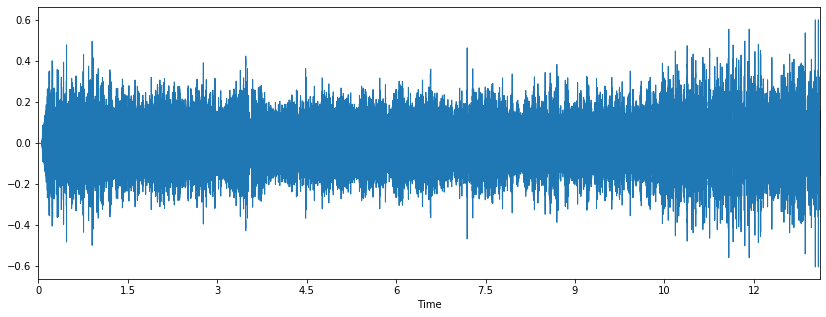

In [5]:
##Visualizing an audio
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

# Spectrogram
##A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.A Spectogram represented as a heat map.

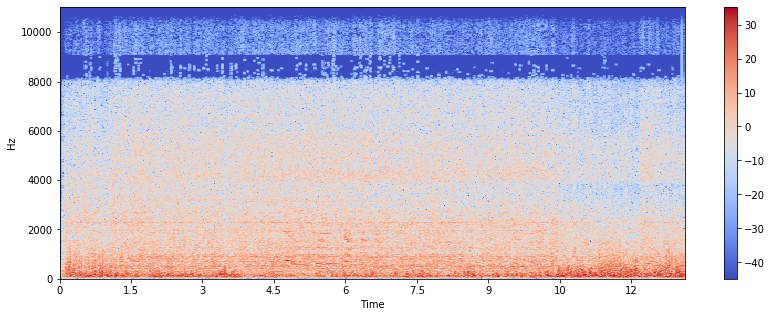

In [6]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

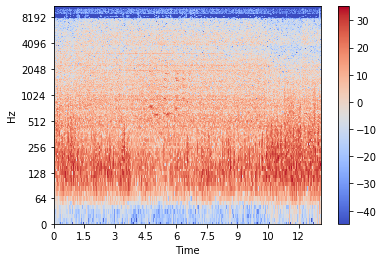

In [7]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## Create an audio signal
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array
#Saving the audio
librosa.output.write_wav('Fan_output.wav', x, sr)

In [47]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)


<Figure size 864x288 with 0 Axes>

# Zero-Crossing Rate
##A very simple way for measuring the smoothness of a signal is to calculate the number of zero-crossing within a segment of that signal. A voice signal oscillates slowly — for example, a 100 Hz signal will cross zero 100 per second — whereas an unvoiced fricative can have 3000 zero crossings per second.

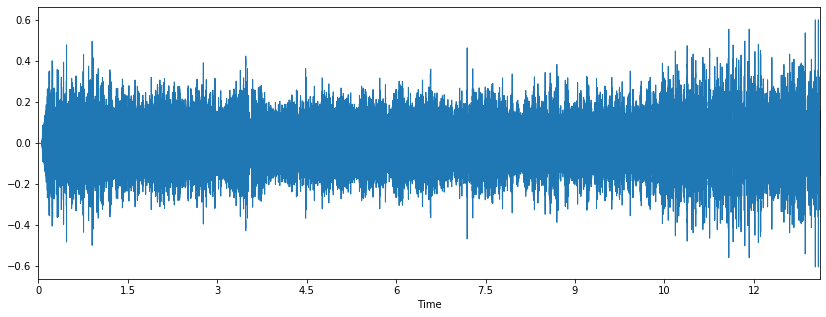

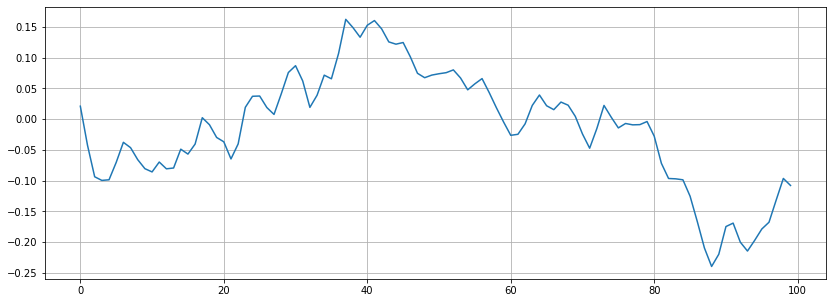

In [27]:
x, sr = librosa.load('A:\Project Coding\Dataset/Fan.wav')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [29]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))#16

9


# Mel-Frequency Cepstral Coefficients(MFCCs)
##The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.

(20, 565)


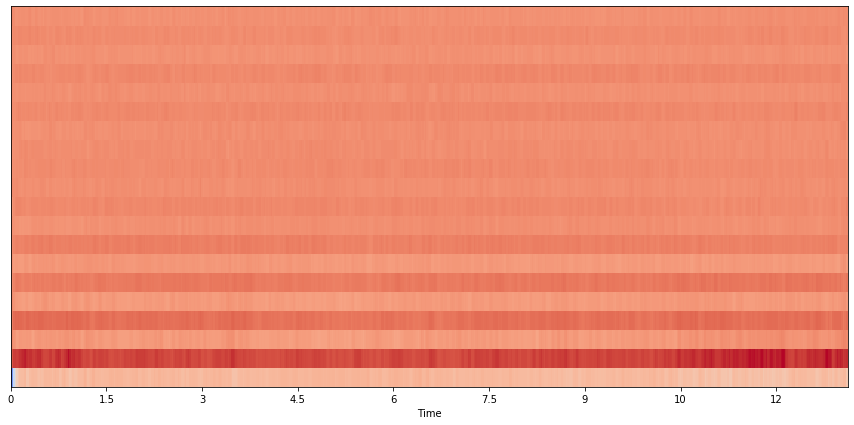

In [31]:
mfccs = librosa.feature.mfcc(x, sr)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

# Chroma feature
##A chroma feature or vector is typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, …, B}, is present in the signal. In short, It provides a robust way to describe a similarity measure between music pieces.

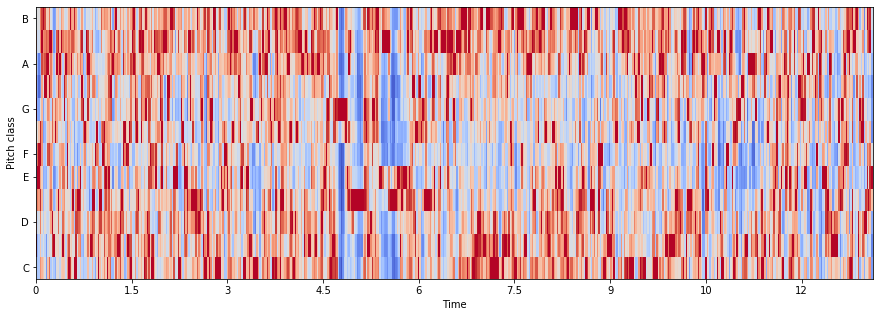

In [33]:
chromagram = librosa.feature.chroma_stft(x, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')

# Let's visualize the sound of Metal Dish

In [34]:
audio_data2="A:\Project Coding\Dataset\Metal_Dish.wav"
x , sr = librosa.load(audio_data2)
print(type(x), type(sr))


<class 'numpy.ndarray'> <class 'int'>


In [55]:
librosa.load("A:\Project Coding\Dataset/Metal_Dish.wav", sr=None)

(array([ 0.        ,  0.        ,  0.        , ..., -0.00062561,
        -0.00064087, -0.00126648], dtype=float32),
 44100)

In [36]:
ipd.Audio(audio_data2)

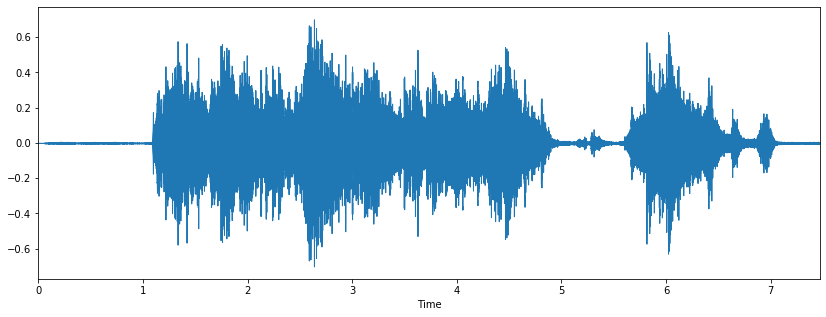

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

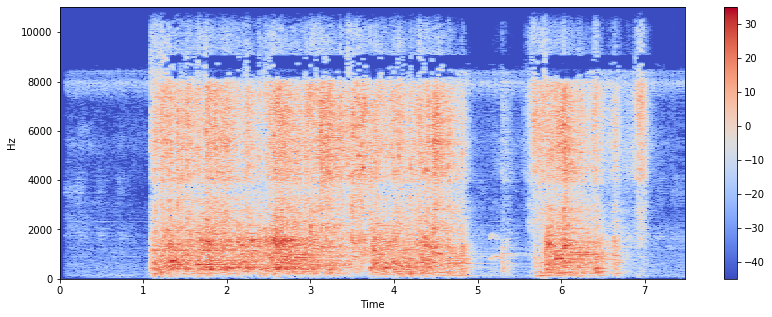

In [38]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

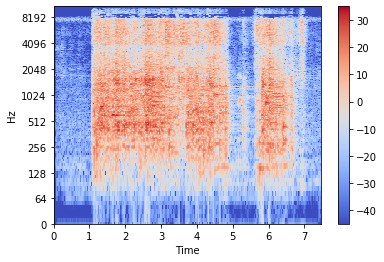

In [39]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [40]:
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array
#Saving the audio
librosa.output.write_wav('Metal_Dish_output.wav', x, sr)

In [45]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)


<Figure size 864x288 with 0 Axes>

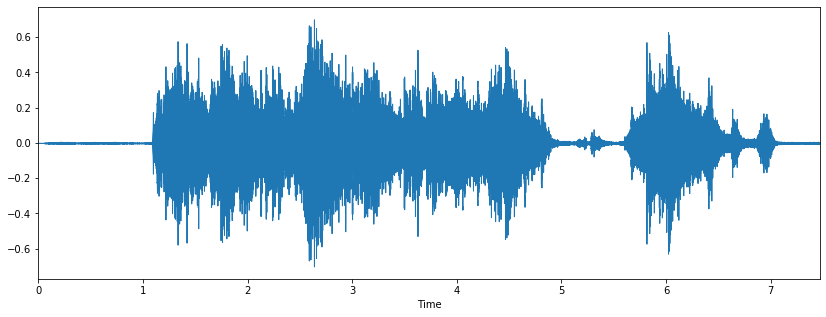

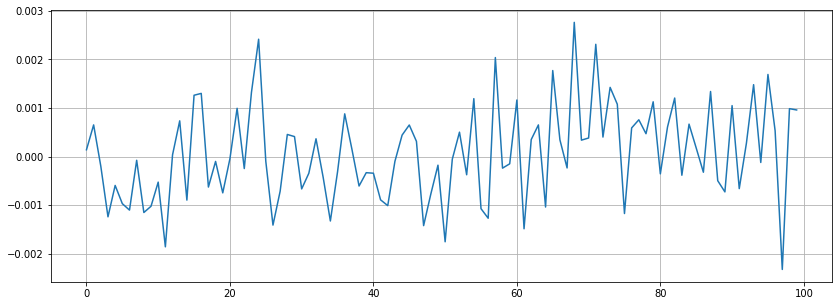

In [46]:
x, sr = librosa.load('A:\Project Coding\Dataset\Metal_Dish.wav')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

(20, 322)


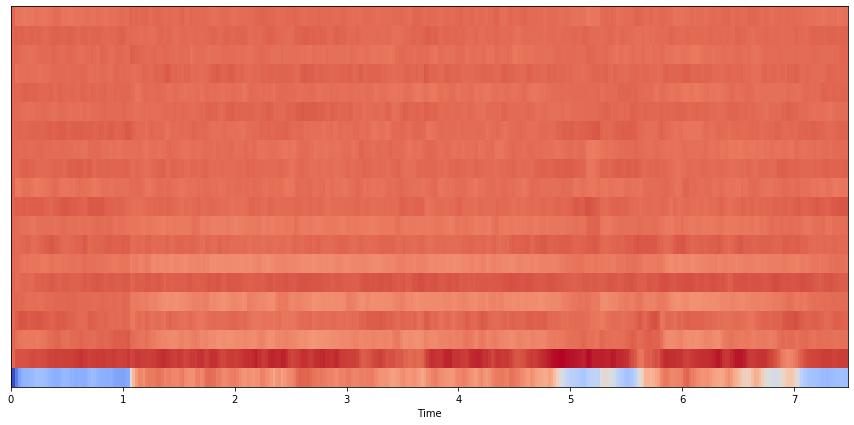

In [48]:
mfccs = librosa.feature.mfcc(x, sr)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')


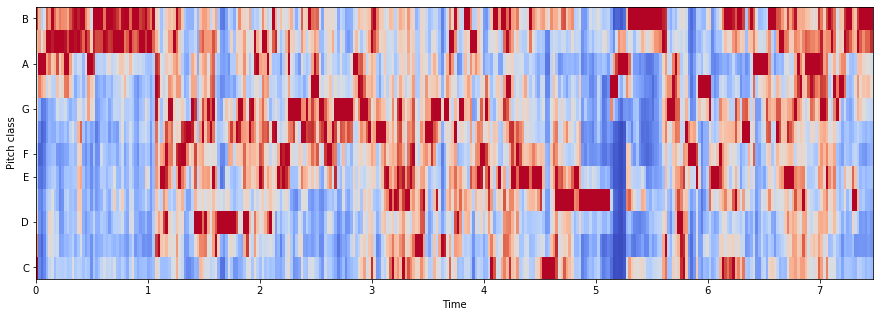

In [49]:
chromagram = librosa.feature.chroma_stft(x, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')

# Sound of Metal Dish Collision